<a href="https://colab.research.google.com/github/jYash2309/NLP_PROJECT_ROUND-1-2/blob/main/NLP_Project_Round_one_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd 
import nltk
import string
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
from nltk.tokenize import word_tokenize
#These are the python libraries used

In [ ]:
nltk.download('stopwords')

nltk.download('punkt')

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
#To open the file
file = open(r"/content/NlpBook.txt",encoding='utf-8')
listofwords = file.read().splitlines()  
listofwords = [i for i in listofwords if i!='']
text = ""
text = text.join(listofwords)

Loading the book

In [ ]:
#Defining string which contains the punctuations to reject
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
filteredtext = ""
for i in text:
    if i not in punctuations:
        filteredtext = filteredtext + i
        
#Making the result lowercase
filteredtext = filteredtext.lower()


In [ ]:
tokenisedtext = word_tokenize(filteredtext)
print(tokenisedtext[:10]) #Printing the first 10 most frequent tokens of filtered text. 

['in', 'which', 'we', 'try', 'to', 'explain', 'why', 'we', 'consider', 'artificial']


In [ ]:
frequency_distribution=nltk.FreqDist(filteredtext) 

In [ ]:
print(frequency_distribution.most_common(10))
freq_dist = list(frequency_distribution)


[(' ', 2327005), ('e', 315885), ('t', 240984), ('a', 216459), ('i', 202808), ('n', 192123), ('o', 189693), ('s', 177341), ('r', 157819), ('l', 111128)]


In [ ]:
import seaborn as sb
sb.set(style='darkgrid')
dataf=pd.DataFrame(tokenisedtext)

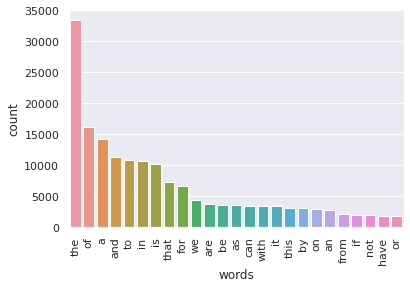

In [ ]:
sb.countplot(x=dataf[0],order=dataf[0].value_counts().iloc[:25].index)
plt.xticks(rotation=90)
plt.xlabel('words')
plt.show()
#Plotting the counts of the most frequent words ordered in descending order of their frequencies. 

In [ ]:
Stopwordswordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(filteredtext)

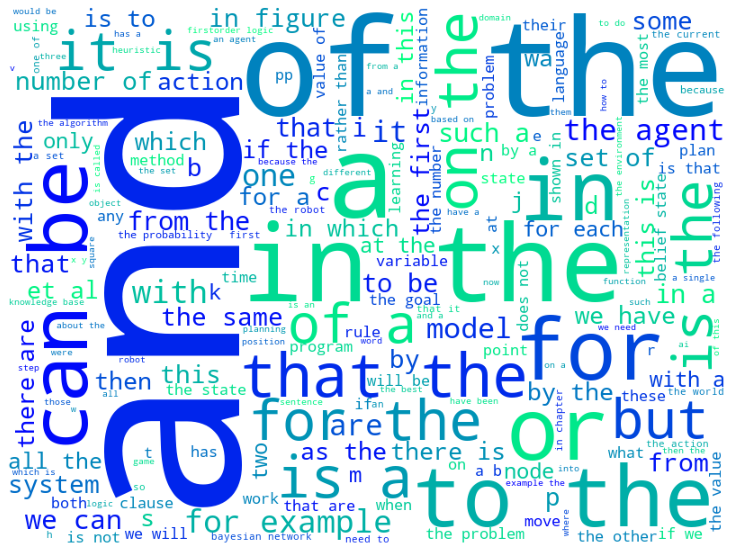

In [ ]:
plt.figure(figsize = (10,8), facecolor = None) 
plt.imshow(Stopwordswordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [ ]:
# Stop words need to be removed. So to remove them  
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(filteredtext)
final_tokens = [i for i in tokens if not i in stop_words] 
finaltext = "  "
finaltext = finaltext.join(final_tokens)

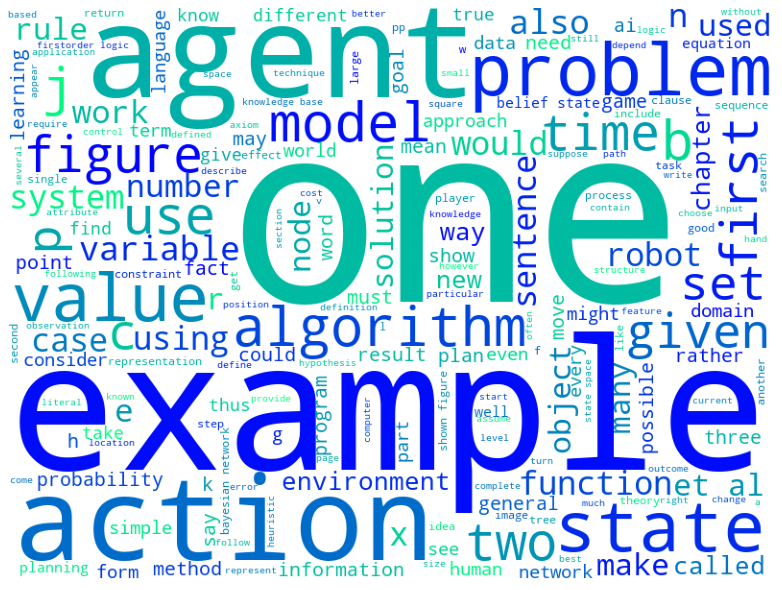

In [ ]:
# Word cloud after Stopwords removal
wc_withoutStopwords = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(finaltext) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wc_withoutStopwords) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [ ]:
new_freq_dist=nltk.FreqDist(finaltext)
print(new_freq_dist.most_common(15))
freq_dist=list(new_freq_dist)

[(' ', 675318), ('e', 246578), ('i', 163375), ('a', 156054), ('t', 153563), ('n', 150480), ('s', 148483), ('r', 136382), ('o', 132806), ('l', 104213), ('c', 87814), ('p', 66287), ('d', 64196), ('m', 61539), ('u', 59125)]


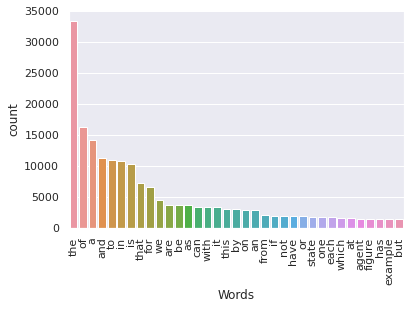

In [ ]:
new_dataframe=pd.DataFrame(tokenisedtext)
sb.countplot(x=new_dataframe[0], order=new_dataframe[0].value_counts().iloc[:35].index)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.show()
#Plotting the count after stopwords removal

In [ ]:
length=[]
for x in tokenisedtext:
 length.append(len(x))
length[:20]

[2, 5, 2, 3, 2, 7, 3, 2, 8, 10, 12, 2, 2, 1, 7, 4, 6, 2, 5, 3]

In [ ]:
frequency_distribution_length=nltk.FreqDist(length)

In [ ]:
frequency_distribution_length

FreqDist({3: 97315, 2: 93448, 4: 78358, 5: 52272, 7: 42332, 6: 40948, 1: 38872, 8: 34730, 9: 24855, 10: 18177, ...})

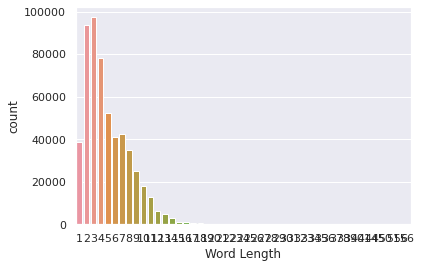

In [ ]:
dataf_length=pd.DataFrame(length)
sb.countplot(x=dataf_length[0])
plt.xlabel('Word Length')
plt.show()

In [ ]:
tagging = nltk.pos_tag(tokenisedtext) 
tagging[:10] #First 10 tags

[('in', 'IN'),
 ('which', 'WDT'),
 ('we', 'PRP'),
 ('try', 'VBP'),
 ('to', 'TO'),
 ('explain', 'VB'),
 ('why', 'WRB'),
 ('we', 'PRP'),
 ('consider', 'VBP'),
 ('artificial', 'JJ')]

In [ ]:
from collections import Counter
counts = Counter( tag for word,  tag in tagging)
print(counts)

Counter({'NN': 130391, 'IN': 64912, 'DT': 61347, 'JJ': 54606, 'CD': 35706, 'NNS': 35689, 'VBZ': 21215, 'RB': 19264, 'VB': 18565, 'CC': 14806, 'VBP': 14267, 'VBN': 12185, 'VBG': 10882, 'TO': 10873, 'PRP': 10040, 'MD': 7546, 'VBD': 6803, 'NNP': 6110, 'WDT': 4374, 'WRB': 2354, 'PRP$': 2126, 'JJR': 1492, 'JJS': 1117, 'EX': 1093, 'WP': 1085, 'RP': 932, 'RBR': 877, 'PDT': 611, 'FW': 485, 'RBS': 380, 'WP$': 187, '$': 149, 'UH': 10, '``': 8, 'POS': 7, 'SYM': 5})


In [ ]:
import numpy as np
bin_size=np.linspace(0,10)

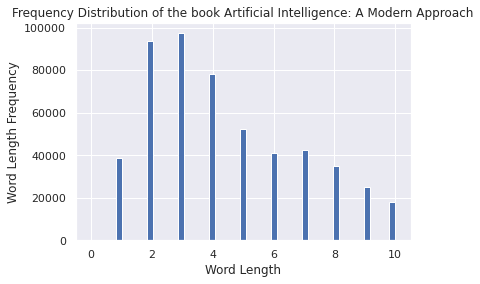

In [ ]:
#Finding Wordlength and storing it as a list
wordLength = [len(r) for r in tokenisedtext]

#Plotting histogram of Word length vs Frequency
plt.hist(wordLength, bins=bin_size)
plt.xlabel('Word Length')
plt.ylabel('Word Length Frequency')
plt.title('Frequency Distribution of the book Artificial Intelligence: A Modern Approach')
plt.show()

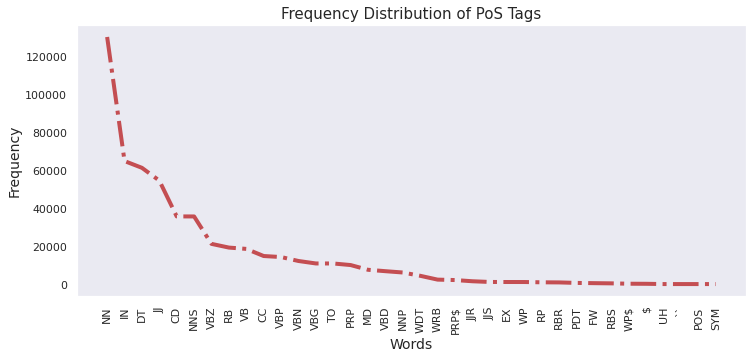

In [ ]:
#Frequency Distribution of PoS Tags

pos_tags_freq = nltk.FreqDist(counts)
pos_tags_freq = {k: v for k, v in sorted(pos_tags_freq.items(), key=lambda item: item[1],reverse=True)}
x = list(pos_tags_freq.keys())[:40]
y = list(pos_tags_freq.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('Frequency Distribution of PoS Tags',size=15)
plt.xlabel('Words',size=14)
plt.ylabel('Frequency',size=14)
plt.show()